In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Importing and cleaning data

In [5]:
df_store = pd.read_csv('/Users/igorrudakov/python_projects/portfolio_tests/practice_blind_python/Salesstore.csv')


In [7]:
df_store.columns = [i.lower().replace(' ','') for i in df_store.columns]
df_store.head()


,order_id,order_priority,order_quantity,sales,ship_mode,profit,customer_name,region,customer_segment,product_category,product_sub-category,product_name,product_container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [9]:
# df_store.isna().sum()

#### EDA

In [12]:
df_store.describe().astype(int)

,order_id,order_quantity,sales,profit
count,730,730,730,730
mean,29721,24,1502,207
std,17350,14,2893,878
min,35,1,8,-4437
25%,14479,13,171,-77
50%,29350,25,438,0
75%,44978,37,1480,180
max,59909,50,27663,8417


In [117]:
df_store.columns.values

array(['order_id', 'order_priority', 'order_quantity', 'sales',
       'ship_mode', 'profit', 'customer_name', 'region',
       'customer_segment', 'product_category', 'product_sub-category',
       'product_name', 'product_container'], dtype=object)

In [ ]:
Step 1:
Identify target metric: it evaluates the result. Usually: revenue, profit, cost, conversion (target action).
You can also combine metrics to get a useful mix-metric


Step 2: 
List the remaining metrics and order them from larger to smaller in terms of level of detail


Step 3: 
For each feature in order of magnitude - compare useful metric 

Target metrics:
'order_quantity', 
'profit',
'sales',
'ROI' = 'profit' / 'sales'



Features or categories

'ship_mode'
, 'product_category'
, 'product_container'
, 'customer_segment'
, 'order_priority'
, 'region'
, 'product_sub-category'
, 'customer_name'
, 'product_name'
, 'order_id'

<Axes: xlabel='ship_mode', ylabel='ROI'>

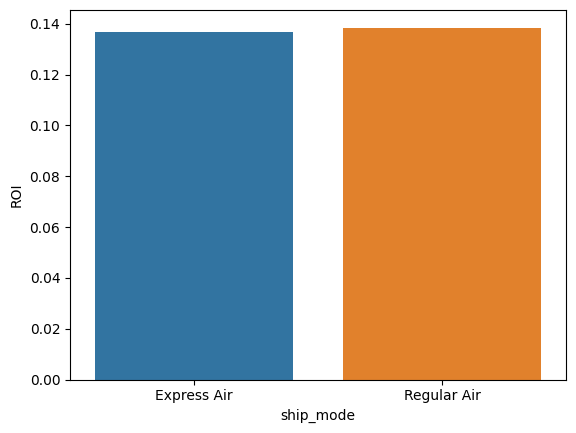

In [146]:
# who are the customers that we don't make money from 
df = df_store.groupby('ship_mode', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[0], y= df.columns[ len(df.columns)-1 ] )

<Axes: xlabel='product_category', ylabel='ROI'>

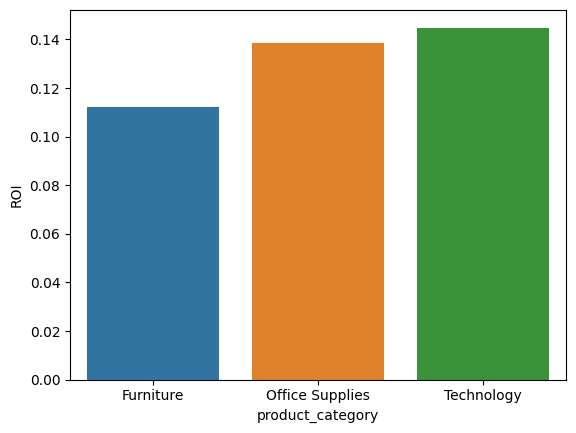

In [147]:
# who are the customers that we don't make money from 
df = df_store.groupby('product_category', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[0], y= df.columns[ len(df.columns)-1 ] )

<Axes: xlabel='product_container', ylabel='ROI'>

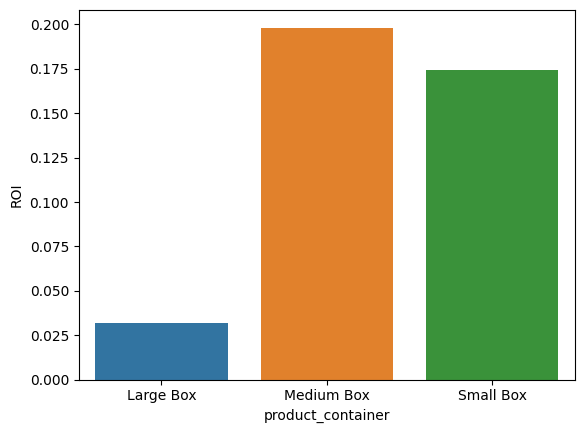

In [148]:
# who are the customers that we don't make money from 
df = df_store.groupby('product_container', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[0], y= df.columns[ len(df.columns)-1 ] )

<Axes: xlabel='customer_segment', ylabel='ROI'>

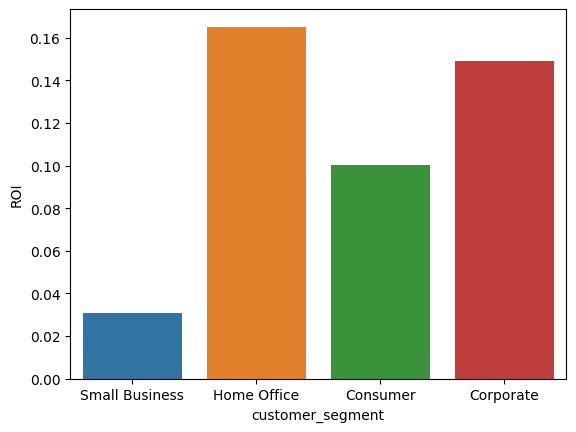

In [149]:
# who are the customers that we don't make money from 
df = df_store.groupby('customer_segment', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[0], y= df.columns[ len(df.columns)-1 ] )

<Axes: xlabel='order_priority', ylabel='ROI'>

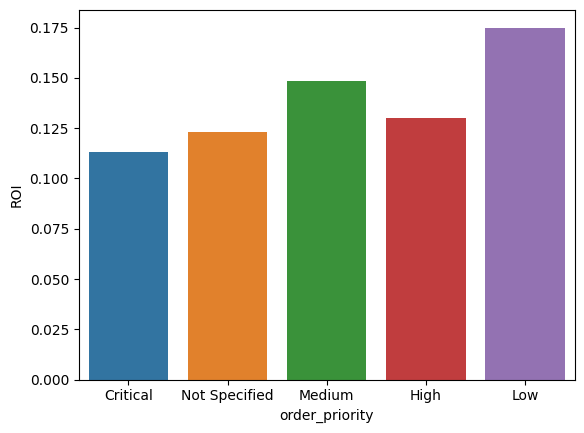

In [150]:
# who are the customers that we don't make money from 
df = df_store.groupby('order_priority', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[0], y= df.columns[ len(df.columns)-1 ] )

<Axes: xlabel='region', ylabel='ROI'>

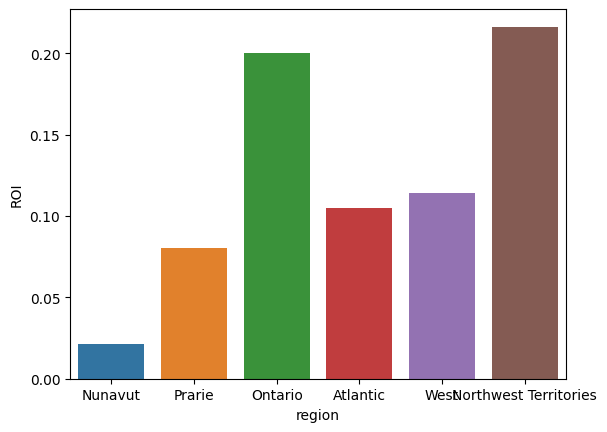

In [151]:
# who are the customers that we don't make money from 
df = df_store.groupby('region', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[0], y= df.columns[ len(df.columns)-1 ] )

<Axes: xlabel='ROI', ylabel='product_sub-category'>

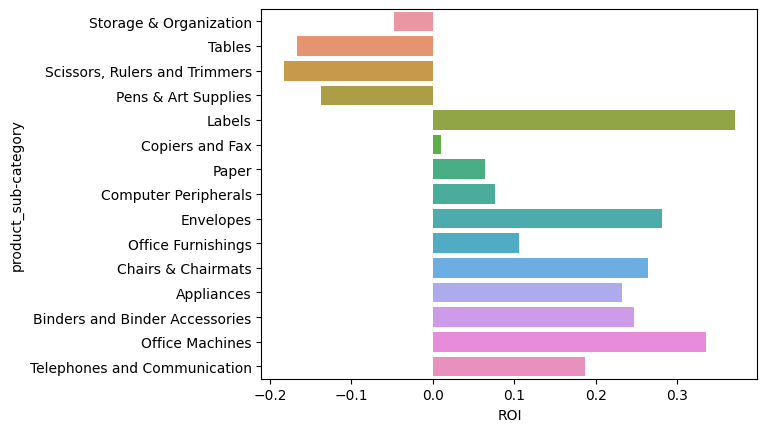

In [153]:
# who are the customers that we don't make money from 
df = df_store.groupby('product_sub-category', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)

sns.barplot(df, x=df.columns[ len(df.columns)-1 ] , y= df.columns[0] )

<Axes: xlabel='ROI_norm', ylabel='customer_name'>

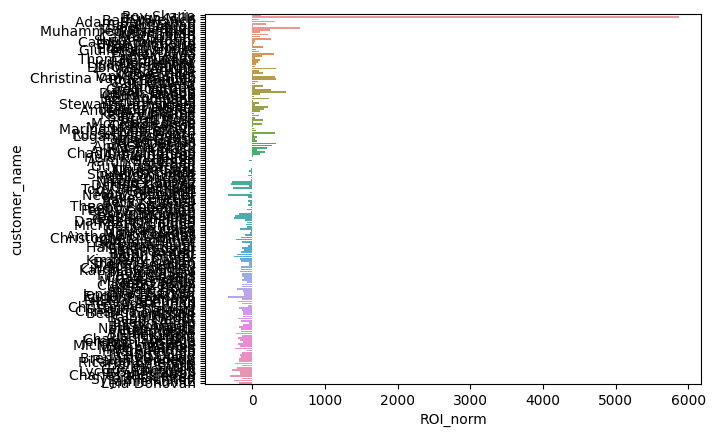

In [158]:
# who are the customers that we don't make money from 
df = df_store.groupby('customer_name', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .assign(ROI_norm= lambda x: round( x.ROI / x.ROI.mean() ,0 ) )\
              .sort_values(by='profit', ascending=True)



sns.barplot(df, x=df.columns[ len(df.columns)-1 ] , y= df.columns[0] )

In [ ]:
'ship_mode'
, 'product_category'
, 'product_container'
, 'customer_segment'
, 'order_priority'
, 'region'
, 'product_sub-category'
, 'customer_name'
, 'product_name'
, 'order_id'

In [135]:
# who are the customers that we don't make money from 
df_store.groupby(['customer_segment', 'product_container', 'order_priority'], as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by=['customer_segment','count'], ascending=False)\
              [['customer_segment',	'product_container',	'order_priority',	'count',	'ROI']]

,customer_segment,product_container,order_priority,count,ROI
46,Small Business,Small Box,Critical,6,0.185026
50,Small Business,Small Box,Not Specified,5,0.085720
47,Small Business,Small Box,High,4,-0.027368
48,Small Business,Small Box,Low,4,0.146516
49,Small Business,Small Box,Medium,3,-0.018158
43,Small Business,Large Box,Not Specified,2,-1.364993
41,Small Business,Large Box,Low,1,0.221946
42,Small Business,Large Box,Medium,1,-0.636130
44,Small Business,Medium Box,Medium,1,0.253510
45,Small Business,Medium Box,Not Specified,1,0.258953


In [112]:
# are we making money
df_store[['profit','sales', 'order_quantity']].sum().to_frame().astype(int)

,0
profit,151459
sales,1097027
order_quantity,18146


In [72]:
# who are our top customers and what their stats
df_store.groupby('customer_name', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='revenue', ascending=False)

,customer_name,count,revenue,profit,ROI
82,Jack Lebron,17,48039,-850,-0.017694
166,Sylvia Foulston,10,38759,8085,0.208597
171,Tony Chapman,4,35041,-197,-0.005622
107,Lela Donovan,12,30470,8664,0.284345
59,Erica Bern,13,30340,2103,0.069314
...,...,...,...,...,...
8,Annie Cyprus,1,49,-8,-0.163265
7,Anna Andreadi,1,49,-20,-0.408163
144,Rick Duston,1,44,-21,-0.477273
35,Chad Cunningham,1,40,-10,-0.250000


In [113]:
# who are the customers that we don't make money from 
df = df_store.groupby('customer_name', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=True)\
              .query('ROI < 0')

first_five = df.iloc[:8]
remaining = df.iloc[8:].sum().to_frame().T
remaining['customer_name'] = 'Others'
remaining['ROI'] =  remaining.profit / remaining.revenue
remaining['ROI'] = remaining['ROI'].astype(int)
pd.concat( [first_five, remaining] , axis=0)



,customer_name,count,revenue,profit,ROI
150,Roy Skaria,8,24933,-4361,-0.174909
28,Bryan Mills,1,237,-2088,-8.810127
14,Barry Weirich,3,10712,-1326,-0.123786
1,Adam Bellavance,1,1974,-929,-0.470618
156,Sarah Jordon,2,3020,-863,-0.285762
82,Jack Lebron,17,48039,-850,-0.017694
122,Maya Herman,1,820,-800,-0.975610
129,Muhammed MacIntyre,3,2144,-790,-0.368470
0,Others,199,173800,-10776,0.000000


In [114]:
# who are the customers that we  make money from 
df = df_store.groupby('customer_name', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=False)\
              .query('ROI > 0')

first_five = df.iloc[:8]
remaining = df.iloc[8:].sum().to_frame().T
remaining['customer_name'] = 'Others'
remaining['ROI'] =  remaining.profit / remaining.revenue
remaining['ROI'] = remaining['ROI'].astype(int)
pd.concat( [first_five, remaining] , axis=0)



,customer_name,count,revenue,profit,ROI
107,Lela Donovan,12,30470,8664,0.284345
83,Jamie Kunitz,4,22450,8385,0.373497
166,Sylvia Foulston,10,38759,8085,0.208597
145,Rick Reed,1,16066,7416,0.461596
37,Charles McCrossin,5,24622,6313,0.256397
68,Grant Carroll,8,22878,5877,0.256884
114,Lycoris Saunders,3,13008,5431,0.417512
71,Guy Thornton,7,16952,5295,0.312353
0,Others,445,646054,118753,0.000000


In [103]:
# who are the customers that we  make money from 
df_store.groupby('region', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=False)


,region,count,revenue,profit,ROI
1,Northwest Territories,150,275140,59551,0.216439
5,West,232,346001,39414,0.113913
0,Atlantic,170,271205,28393,0.104692
3,Ontario,67,81727,16375,0.200362
4,Prarie,79,86646,6944,0.080142
2,Nunavut,32,36306,780,0.021484


In [104]:
# who are the customers that we  make money from 
df_store.groupby('customer_segment', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=False)

,customer_segment,count,revenue,profit,ROI
1,Corporate,518,805343,120106,0.149136
0,Consumer,153,186041,18641,0.100198
2,Home Office,31,70363,11619,0.165129
3,Small Business,28,35280,1092,0.030952


In [105]:
# who are the customers that we  make money from 
df_store.groupby('product_category', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=False)

,product_category,count,revenue,profit,ROI
2,Technology,185,561675,81368,0.144867
1,Office Supplies,447,383538,53073,0.138377
0,Furniture,98,151813,17017,0.112092


<Axes: xlabel='product_name', ylabel='ROI'>

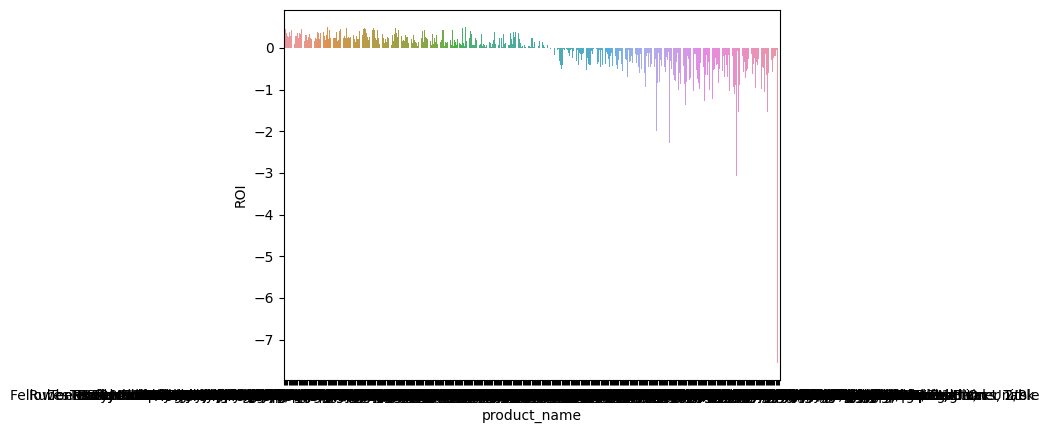

In [106]:
# who are the customers that we  make money from 
df = df_store.groupby('product_name', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=False)

sns.barplot(df, x='product_name', y='ROI')

In [107]:
df.product_name.nunique()

445

In [111]:
df_store.groupby('product_sub-category', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            , unique_sku=('product_name', 'nunique')
            
            )\
              .astype({'count':int, 'revenue':int, 'profit':int})\
              .assign(ROI= lambda x: x.profit / x.revenue)\
              .sort_values(by='profit', ascending=False)

,product_sub-category,count,revenue,profit,unique_sku,ROI
14,Telephones and Communication,94,256536,47992,60,0.187077
8,Office Machines,24,80050,26832,11,0.335191
1,Binders and Binder Accessories,137,106501,26291,79,0.246862
0,Appliances,54,97805,22731,38,0.232411
2,Chairs & Chairmats,10,46081,12164,4,0.263970
7,Office Furnishings,83,82682,8700,44,0.105222
5,Envelopes,33,21486,6049,24,0.281532
3,Computer Peripherals,54,65475,4982,32,0.076090
9,Paper,120,48963,3124,77,0.063803
4,Copiers and Fax,13,159614,1561,5,0.009780


In [101]:
df_store.head()

,order_id,order_priority,order_quantity,sales,ship_mode,profit,customer_name,region,customer_segment,product_category,product_sub-category,product_name,product_container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


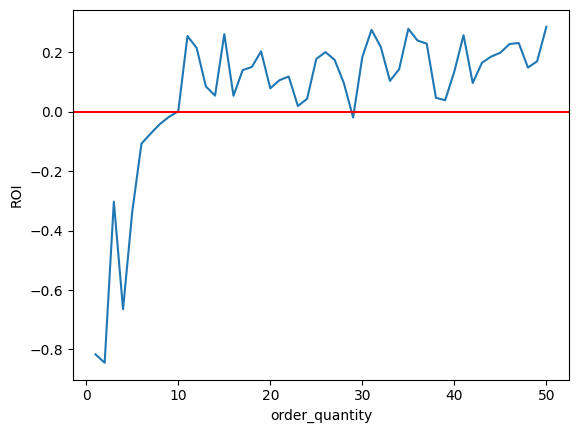

In [42]:
# order quantity to profit
df= df_store.groupby('order_quantity', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            )\
              .astype(int)\
              .assign(ROI= lambda x: x.profit / x.revenue)

sns.lineplot(df, x='order_quantity', y='ROI')
# plt.title('Profit over revenue as the order value increases')
plt.axhline(y=0, c='r' )
plt.show()


In [ ]:
Ограничение: юзеры с заказами -> какие параметры джойнить

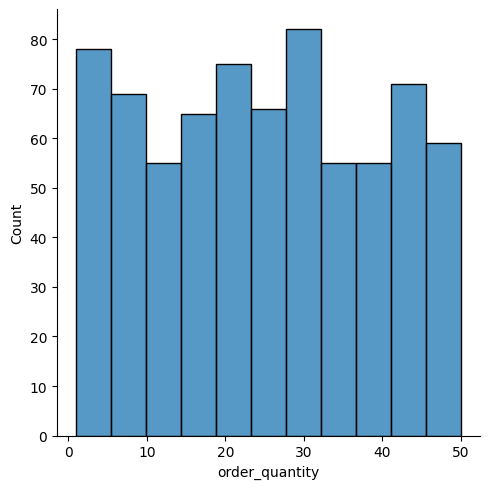

In [48]:
sns.displot(df_store, x=df_store.order_quantity)

In [49]:
df_store.columns

Index(['order_id', 'order_priority', 'order_quantity', 'sales', 'ship_mode',
       'profit', 'customer_name', 'region', 'customer_segment',
       'product_category', 'product_sub-category', 'product_name',
       'product_container'],
      dtype='object')

In [ ]:
sns.displot(df_store, x=df_store.order_quantity)

<Axes: xlabel='order_priority', ylabel='ROI'>

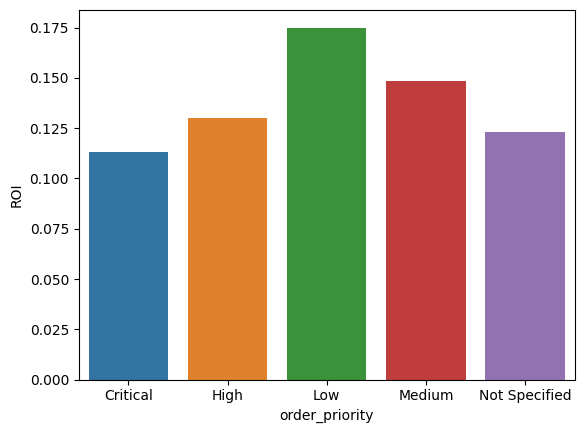

In [57]:
a_2 = df_store.groupby('order_priority', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            ).astype({'count': int, 'revenue': int, 'profit': int})\
             .assign(ROI= lambda x: x.profit / x.revenue)

sns.barplot(a_2, x='order_priority', y='ROI')

In [60]:
a_2 = df_store.groupby('ship_mode', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            ).astype({'count': int, 'revenue': int, 'profit': int})\
             .assign(ROI= lambda x: x.profit / x.revenue)
a_2
# sns.barplot(a_2, x='ship_mode', y='ROI')

,ship_mode,count,revenue,profit,ROI
0,Express Air,151,242731,33159,0.136608
1,Regular Air,579,854296,118300,0.138477


In [ ]:
a_2 = df_store.groupby('ship_mode', as_index=False)\
            .agg(
              count=('order_id', 'count')
            , revenue=('sales', 'sum')
            , profit=('profit', 'sum')
            ).astype({'count': int, 'revenue': int, 'profit': int})\
             .assign(ROI= lambda x: x.profit / x.revenue)

In [61]:
df_store.head()

,order_id,order_priority,order_quantity,sales,ship_mode,profit,customer_name,region,customer_segment,product_category,product_sub-category,product_name,product_container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box
